In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# ## Importing the dataset
dataset = pd.read_csv('heart_attack_risk_dataset.csv')
dataset.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [41]:
dataset.describe()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.498280,0.298420,0.401980,1.20098,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,1.301400,1.508320,1.003180,0.149360,1.001460,0.201640,149.305340
std,20.799006,0.500002,0.457569,0.490303,0.74726,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.778852,1.118461,0.814901,0.356447,0.814881,0.401229,28.823699
min,18.000000,0.000000,0.000000,0.000000,0.00000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,0.000000,1.00000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,0.000000,1.00000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,1.000000,2.00000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,1.000000,2.00000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,199.000000


In [42]:
dataset['Heart_Attack_Risk'].value_counts()

Heart_Attack_Risk
Low         25024
Moderate    14904
High        10072
Name: count, dtype: int64

<Axes: >

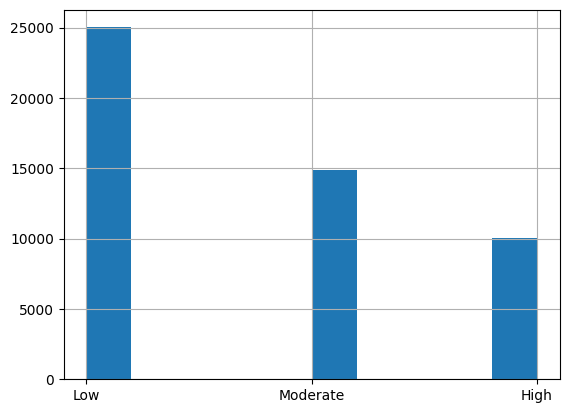

In [44]:
dataset['Heart_Attack_Risk'].hist()

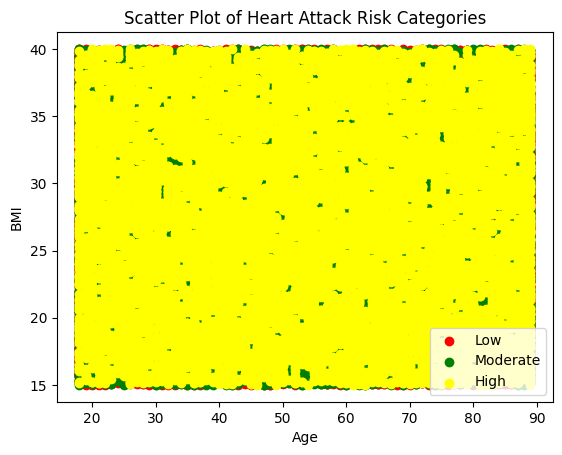

In [52]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'yellow']
categories = ['Low', 'Moderate', 'High']

for i in range(3):
    x = dataset[dataset['Heart_Attack_Risk'] == categories[i]]
    plt.scatter(x['Age'], x['BMI'], c=colors[i], label=categories[i])  #plotting 'Age' vs 'BMI'

plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.title('Scatter Plot of Heart Attack Risk Categories')
plt.show()

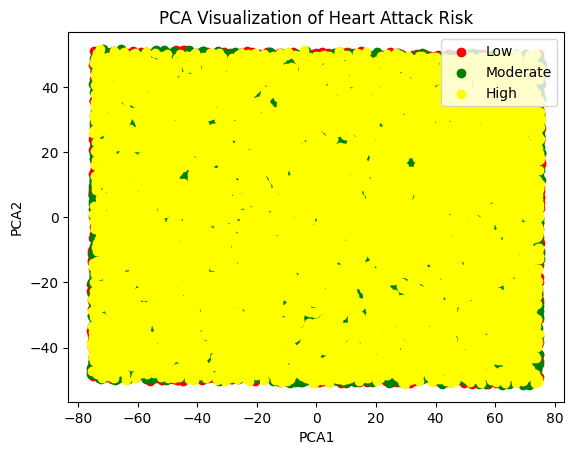

In [53]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
features = dataset[['Age', 'Gender', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity_Level',
                    'BMI', 'Diabetes', 'Hypertension', 'Cholesterol_Level', 'Resting_BP',
                    'Heart_Rate', 'Family_History', 'Stress_Level', 'Chest_Pain_Type',
                    'Thalassemia', 'Fasting_Blood_Sugar', 'ECG_Results',
                    'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved']]
pca_result = pca.fit_transform(features)

# Add PCA results to the dataset
dataset['PCA1'] = pca_result[:, 0]
dataset['PCA2'] = pca_result[:, 1]

# Scatter plot PCA results
for i in range(3):
    x = dataset[dataset['Heart_Attack_Risk'] == categories[i]]
    plt.scatter(x['PCA1'], x['PCA2'], c=colors[i], label=categories[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('PCA Visualization of Heart Attack Risk')
plt.show()

In [16]:
# ##Encode Categorical Features
features = ['Age', 'Gender', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension', 'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History', 'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar', 'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved']
target = 'Heart_Attack_Risk'

label_encoders = {}
for col in ['Gender','Physical_Activity_Level', 'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'ECG_Results']:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

# ## Splitting the dataset into the Training set and Test set
X = dataset[features]
y = dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# ## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

SVM MODEL TRAINING

In [18]:
# ## Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=42)  # You can change the kernel to 'rbf', 'poly', etc.
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [19]:
y_pred=classifier.predict(X_test)

In [20]:
# ## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[   0 1987    0]
 [   0 5083    0]
 [   0 2930    0]]


0.5083

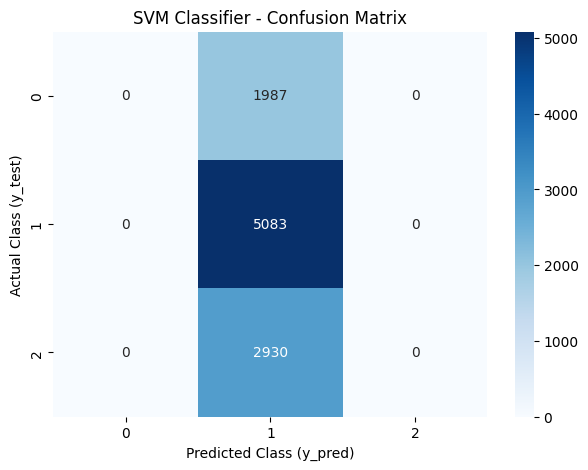

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=['0', '1', '2'],  # Actual classes
                     columns=['0', '1', '2'])  # Predicted classes

plt.figure(figsize=(7, 5))  
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')  
plt.title('SVM Classifier - Confusion Matrix')
plt.ylabel('Actual Class (y_test)')
plt.xlabel('Predicted Class (y_pred)')
plt.show()

In [55]:
# ## Results of SVM
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='macro') 
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='macro')  
print(f"Recall:    {recall:.2f}")

fscore = f1_score(y_test, y_pred, average='macro') 
print(f"F1-score:  {fscore:.2f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred)}")

Precision: 0.17
Recall:    0.33
F1-score:  0.22
Accuracy:  0.5083


d:\Python ML\Python Virtual Environment\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN MODEL TRAINING

In [36]:
from sklearn.neighbors import KNeighborsClassifier 
Classifier = KNeighborsClassifier()
Classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
Y_pred=Classifier.predict(X_test)

In [38]:
# ## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print(cm)
accuracy_score(y_test, Y_pred)

[[ 396 1263  328]
 [1044 3188  851]
 [ 597 1884  449]]


0.4033

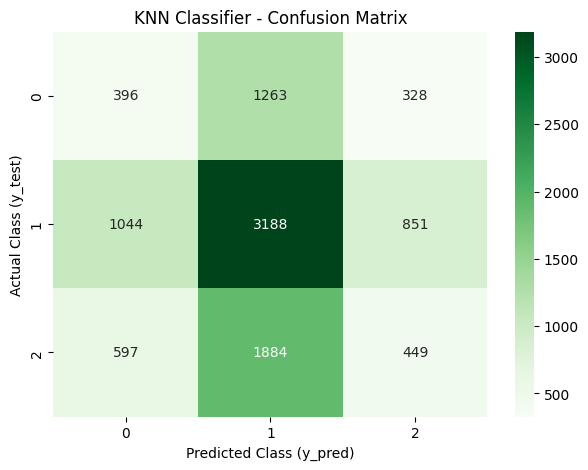

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, Y_pred)
cm_df = pd.DataFrame(cm,
                     index=['0', '1', '2'],  # Actual classes
                     columns=['0', '1', '2'])  # Predicted classes

plt.figure(figsize=(7, 5))  
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens') 
plt.title('KNN Classifier - Confusion Matrix')
plt.ylabel('Actual Class (y_test)')
plt.xlabel('Predicted Class (y_pred)')
plt.show()

In [54]:
# ## Results of KNN
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, Y_pred, average='macro') 
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, Y_pred, average='macro')  
print(f"Recall:    {recall:.2f}")

fscore = f1_score(y_test, Y_pred, average='macro') 
print(f"F1-score:  {fscore:.2f}")
print(f"Accuracy:  {accuracy_score(y_test, Y_pred)}")

Precision: 0.32
Recall:    0.33
F1-score:  0.32
Accuracy:  0.4033


LOGISTIC REGRESSION MODEL TRAINING

In [56]:
# ## Training the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(random_state = 42)
LRclassifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [72]:
LR_pred = LRclassifier.predict(X_test)

In [73]:
# ## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, LR_pred)
print(cm)
accuracy_score(y_test, LR_pred)

[[   0 1987    0]
 [   0 5083    0]
 [   0 2930    0]]


0.5083

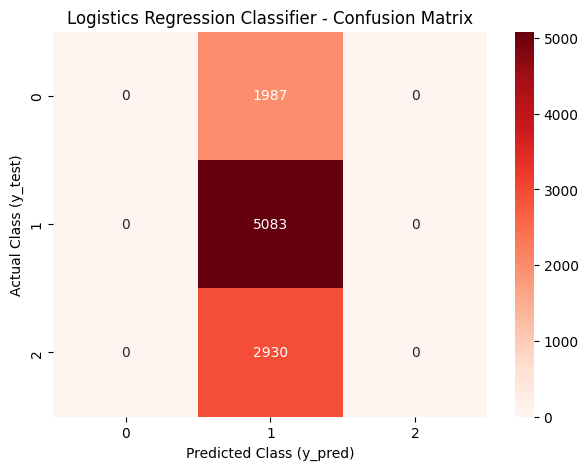

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, LR_pred)
cm_df = pd.DataFrame(cm,
                     index=['0', '1', '2'],  # Actual classes
                     columns=['0', '1', '2'])  # Predicted classes

plt.figure(figsize=(7, 5))  
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds') 
plt.title('Logistics Regression Classifier - Confusion Matrix')
plt.ylabel('Actual Class (y_test)')
plt.xlabel('Predicted Class (y_pred)')
plt.show()

In [76]:
# ## Results of Logistics Regression
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, LR_pred, average='macro') 
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, LR_pred, average='macro')  
print(f"Recall:    {recall:.2f}")

fscore = f1_score(y_test, LR_pred, average='macro') 
print(f"F1-score:  {fscore:.2f}")
print(f"Accuracy:  {accuracy_score(y_test, LR_pred)}")

Precision: 0.17
Recall:    0.33
F1-score:  0.22
Accuracy:  0.5083


d:\Python ML\Python Virtual Environment\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


DECISION TREE MODEL TRAINING

In [77]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [78]:
DT_pred = DTclassifier.predict(X_test)

In [79]:
# ## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, DT_pred)
print(cm)
accuracy_score(y_test, DT_pred)

[[ 391  981  615]
 [1059 2573 1451]
 [ 591 1494  845]]


0.3809

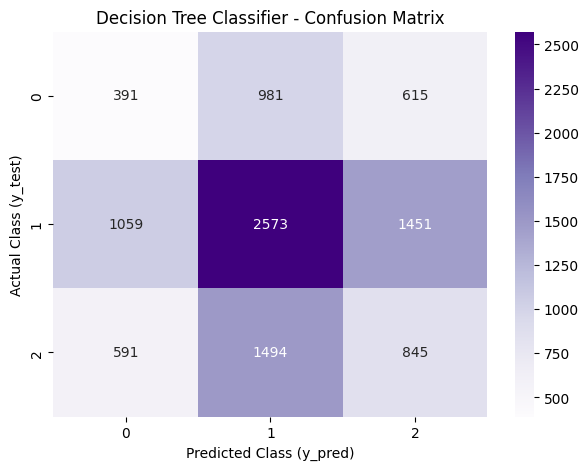

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, DT_pred)
cm_df = pd.DataFrame(cm,
                     index=['0', '1', '2'],  # Actual classes
                     columns=['0', '1', '2'])  # Predicted classes

plt.figure(figsize=(7, 5))  
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Purples') 
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.ylabel('Actual Class (y_test)')
plt.xlabel('Predicted Class (y_pred)')
plt.show()

In [83]:
# ## Results of Decision Tree
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, DT_pred, average='macro') 
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, DT_pred, average='macro')  
print(f"Recall:    {recall:.2f}")

fscore = f1_score(y_test, DT_pred, average='macro') 
print(f"F1-score:  {fscore:.2f}")
print(f"Accuracy:  {accuracy_score(y_test, DT_pred)}")

Precision: 0.33
Recall:    0.33
F1-score:  0.33
Accuracy:  0.3809


NAIVE BAYES MODEL TRAINING

In [71]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

GaussianNB()

In [81]:
NB_pred = NBclassifier.predict(X_test)

In [84]:
# ## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, NB_pred)
print(cm)
accuracy_score(y_test, NB_pred)

[[   0 1987    0]
 [   0 5083    0]
 [   0 2930    0]]


0.5083

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, NB_pred)
cm_df = pd.DataFrame(cm,
                     index=['0', '1', '2'],  # Actual classes
                     columns=['0', '1', '2'])  # Predicted classes

plt.figure(figsize=(7, 5))  
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Orange') 
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.ylabel('Actual Class (y_test)')
plt.xlabel('Predicted Class (y_pred)')
plt.show()

KeyError: "'Orange' is not a known colormap name"

<Figure size 700x500 with 0 Axes>